In [4]:
!pip install fredapi


In [5]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight') #theme using for matplotlib
pd.set_option('display.max_columns', 500) # when the data is too wide
col_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
fred_key = '8a81d5aedcfebb8cf146b309dfa1dc02 '

1. Pulling the data by creating a fred object

In [6]:
fred = Fred(api_key = fred_key)

In [7]:
fred

2. Search for economic data

In [8]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [9]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-09-03,2024-09-03,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-09-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-03 10:52:05-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-09-03,2024-09-03,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-09-03,2024-09-03,S&P 500,2014-09-04,2024-09-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-03 19:43:26-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-09-03,2024-09-03,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-09-03,2024-09-03,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-09-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-03 10:52:07-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-09-03,2024-09-03,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
DDDI01GTA156NWDB,DDDI01GTA156NWDB,2024-09-03,2024-09-03,Private Credit by Deposit Money Banks to GDP f...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:51-05:00,3,The financial resources provided to the privat...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-09-03,2024-09-03,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."


In [10]:
sp_search.shape

(1000, 15)

3. Pulling Raw Data

In [11]:
sp500 = fred.get_series(series_id ='SP500')
sp500

,0
2014-09-04,1997.65
2014-09-05,2007.71
2014-09-08,2001.54
2014-09-09,1988.44
2014-09-10,1995.69
...,...
2024-08-28,5592.18
2024-08-29,5591.96
2024-08-30,5648.40
2024-09-02,NaN


<Axes: title={'center': 'S&P500'}>

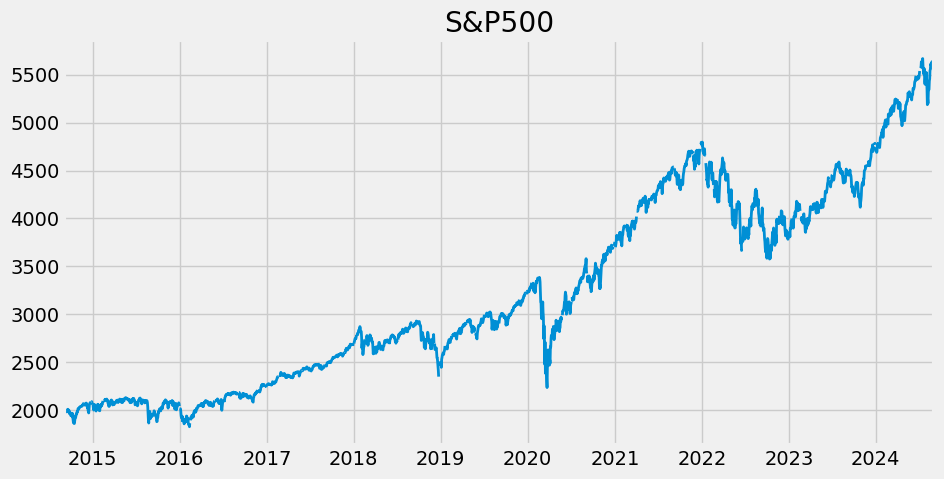

In [12]:
sp500.plot(figsize=(10,5),title = 'S&P500', lw=2)

4. Pulling and Joining Multiple Dataseries

In [13]:
unemp_results = fred.search('unemployment')

In [14]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-03,2024-09-03,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-03,2024-09-03,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-02 07:46:07-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-09-03,2024-09-03,Unemployment Level,1948-01-01,2024-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-08-02 07:46:03-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-09-03,2024-09-03,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-09-03,2024-09-03,Continued Claims (Insured Unemployment),1967-01-07,2024-08-17,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-08-29 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-09-03,2024-09-03,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-09-03,2024-09-03,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-09-03,2024-09-03,Unemployment Rate - Married Women,1955-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:34-05:00,9,To obtain estimates of women worker employment...


In [15]:
unrate = fred.get_series('UNRATE')

In [16]:
unrate

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-03-01,3.8
2024-04-01,3.9
2024-05-01,4.0
2024-06-01,4.1


In [17]:
# unrate.plot(figsize=(10, 6), title='Data Plot up to Latest Date')
unrate.index = pd.to_datetime(unrate.index)

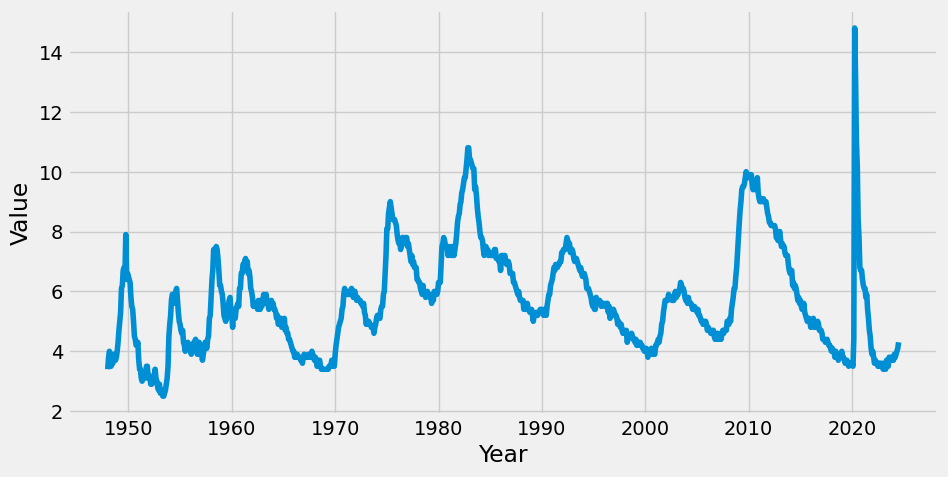

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(unrate.index, unrate.values)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


In [19]:

print(unrate.tail())


2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
dtype: float64


In [20]:
print(unrate.index.max())  # Should return the latest date in your data


2024-07-01 00:00:00


In [21]:
print(unrate.isna().sum())  # Check for missing values



0


In [22]:
print(unrate.loc['2020-01-01':'2024-12-31'])  # Show data from 2020 to 2024


2020-01-01     3.6
2020-02-01     3.5
2020-03-01     4.4
2020-04-01    14.8
2020-05-01    13.2
2020-06-01    11.0
2020-07-01    10.2
2020-08-01     8.4
2020-09-01     7.8
2020-10-01     6.8
2020-11-01     6.7
2020-12-01     6.7
2021-01-01     6.4
2021-02-01     6.2
2021-03-01     6.1
2021-04-01     6.1
2021-05-01     5.8
2021-06-01     5.9
2021-07-01     5.4
2021-08-01     5.1
2021-09-01     4.7
2021-10-01     4.5
2021-11-01     4.1
2021-12-01     3.9
2022-01-01     4.0
2022-02-01     3.8
2022-03-01     3.6
2022-04-01     3.7
2022-05-01     3.6
2022-06-01     3.6
2022-07-01     3.5
2022-08-01     3.6
2022-09-01     3.5
2022-10-01     3.6
2022-11-01     3.6
2022-12-01     3.5
2023-01-01     3.4
2023-02-01     3.6
2023-03-01     3.5
2023-04-01     3.4
2023-05-01     3.7
2023-06-01     3.6
2023-07-01     3.5
2023-08-01     3.8
2023-09-01     3.8
2023-10-01     3.8
2023-11-01     3.7
2023-12-01     3.7
2024-01-01     3.7
2024-02-01     3.9
2024-03-01     3.8
2024-04-01     3.9
2024-05-01  

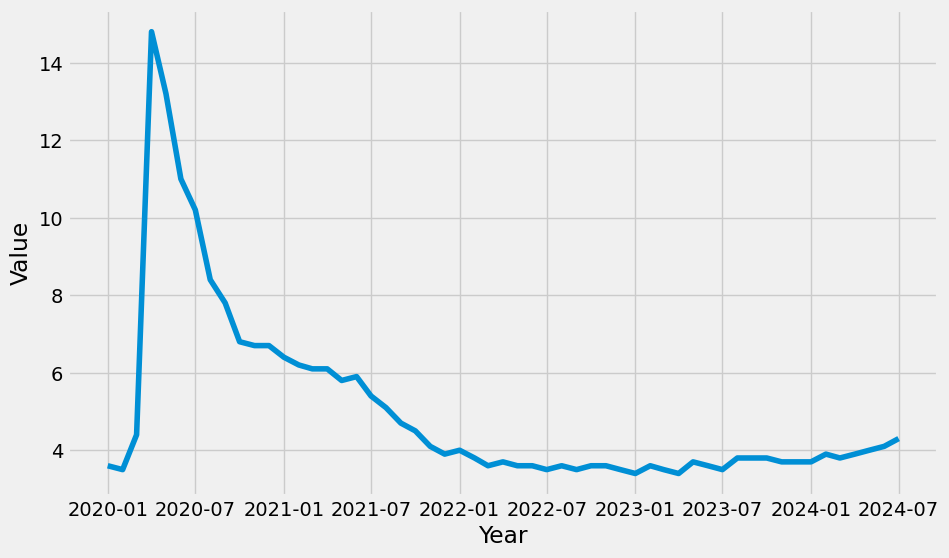

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(unrate['2020-01-01':'2024-12-31'].index, unrate['2020-01-01':'2024-12-31'].values)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


In [24]:
print(type(unrate.index))
print(unrate.index[-10:])  # Check the last 10 dates in the index


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01'],
              dtype='datetime64[ns]', freq=None)


In [25]:
print(unrate.info())  # Ensure all dates and values are correctly aligned


<class 'pandas.core.series.Series'>
DatetimeIndex: 919 entries, 1948-01-01 to 2024-07-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
919 non-null    float64
dtypes: float64(1)
memory usage: 46.6 KB
None


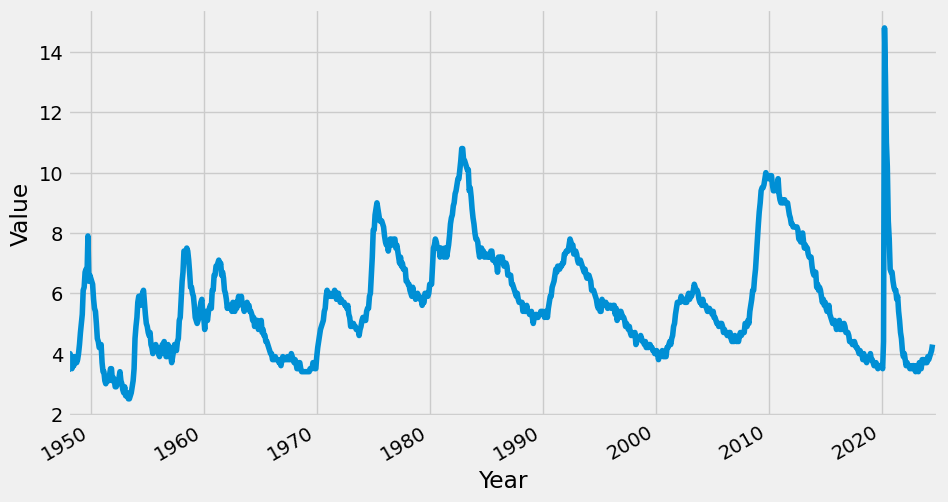

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(unrate.index, unrate.values)
plt.gcf().autofmt_xdate()  # Auto format the x-axis dates
plt.xlim(pd.to_datetime(['1948-01-01', '2024-12-31']))  # Ensure x-axis includes up to 2024
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


In [27]:
unemp_df = fred.search('unemployment rate state',filter =( 'frequency','Monthly'))

In [28]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-03,2024-09-03,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-03,2024-09-03,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-02 07:46:07-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-09-03,2024-09-03,Unemployment Rate - Black or African American,1972-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-09-03,2024-09-03,Unemployment Level,1948-01-01,2024-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-08-02 07:46:03-05:00,71,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-09-03,2024-09-03,Unemployment Rate - Black or African American,1972-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-02 07:46:21-05:00,23,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNU04032220,LNU04032220,2024-09-03,2024-09-03,Unemployment Rate - Sales and Related Occupations,2000-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-02 07:45:23-05:00,4,The series comes from the 'Current Population ...
SCMARI7URN,SCMARI7URN,2024-09-03,2024-09-03,"Unemployment Rate in Marion County, SC",1990-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-28 10:17:06-05:00,4,These data come from the Current Population Su...
VAALBE7URN,VAALBE7URN,2024-09-03,2024-09-03,"Unemployment Rate in Albemarle County, VA",1990-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-28 10:19:07-05:00,4,These data come from the Current Population Su...


In [29]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')

In [30]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-03,2024-09-03,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-09-03,2024-09-03,Unemployment Rate - Black or African American,1972-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-09-03,2024-09-03,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:04-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-09-03,2024-09-03,Unemployment Rate in California,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:01-05:00,64,None
TXUR,TXUR,2024-09-03,2024-09-03,Unemployment Rate in Texas,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:35:02-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000150,LNS14000150,2024-09-03,2024-09-03,Unemployment Rate - Married Men,1955-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:34-05:00,5,The series comes from the 'Current Population ...
NEIPTERM156SFRBRIC,NEIPTERM156SFRBRIC,2024-09-03,2024-09-03,Hornstein-Kudlyak-Lange Non-Employment Index i...,1994-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-10 14:30:04-05:00,5,The Hornstein-Kudlyak-Lange Non-Employment Ind...
LBSSA10,LBSSA10,2024-09-03,2024-09-03,Labor Force Participation Rate for Delaware,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-16 09:01:15-05:00,1,A state's labor-force participation rate is th...


In [31]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

(99, 15)

In [32]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [33]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-03,2024-09-03,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-09-03,2024-09-03,Unemployment Rate - Black or African American,1972-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-09-03,2024-09-03,Unemployment Rate in California,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:01-05:00,64,None
TXUR,TXUR,2024-09-03,2024-09-03,Unemployment Rate in Texas,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:35:02-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-09-03,2024-09-03,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2024-09-03,2024-09-03,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:35-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-09-03,2024-09-03,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:42-05:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-09-03,2024-09-03,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...


In [34]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)


In [35]:
unemp_results

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,LNS14000001,LNS14027660,MIUR,LNS14027662,ALUR,LNS14024887,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,LRUN64TTUSM156S,SCUR,NMUR,MNUR,TNUR,LNS14032183,LNS14000012,WAUR,LNS14027659,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,LASMT261982000000003,NDUR,MTUR,DCUR,MSUR,LNS14000060,LNS14000028,MEUR,NEUR,LASMT391746000000003,CTUR,IDUR,NHUR,LNS14000018,RIUR,KSUR,WYUR,DEUR,LNS14000036,VTUR,LNS14000032,SDUR,CMWRUR,LNS14200000,LRUN24TTUSM156S,LNS14027689,LNS14100000,LNS14000315,LNS14000029,LRHUTTTTUSM156S,LNS14024230,CSOUUR,LNS14000025,LNS14000061,CNERUR,LRUNTTTTUSM156S,CWSTUR,CNEWUR,LNS14000026,LNS14000048,LNS14000089,M08311USM156SNBR,LNS14000150,LRUN25TTUSM156S
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,3.8,6.4,5.3,3.9,NaN,3.5,6.2,NaN,4.3,1.8,3.2,3.9,4.5,3.4,3.4,3.8,3.7,4.1,3.9,2.1,3.0,8.8,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.943665,3.1,3.8,2.7,3.2,2.5,12.6,4.8,4.9,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,3.8,2.0,3.3,5.2,3.0,3.2,2.9,3.3,2.5,3.8,4.5,3.3,2.6,20.1,4.1,2.7,2.8,3.9,7.1,2.2,5.6,2.1,3.6,4.4,8.8,3.4,3.7,2.3,3.2,3.8,2.6,3.4,3.3,3.1,3.9,3.8,4.6,3.3,3.6,3.1,4.1,NaN,1.8,3.2
2024-04-01,3.9,5.6,5.3,4.0,NaN,3.5,5.2,NaN,4.2,1.9,3.3,3.8,4.8,3.5,3.4,4.0,3.9,4.0,3.9,2.2,3.1,8.2,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.935705,3.2,3.8,2.7,3.1,2.8,11.7,4.8,6.0,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,5.8,3.6,4.3,3.1,3.8,2.0,3.1,5.2,2.8,3.2,3.3,3.1,2.5,3.9,4.4,3.3,2.6,18.2,4.1,2.8,2

In [36]:
unemp_states = unemp_results.drop('UNRATE',axis = 1)
unemp_states_clean = unemp_states.dropna()


In [37]:
print(unemp_states.isna().sum())
unemp_states_clean = unemp_states.dropna(subset=['CAUR', 'TXUR', 'NYUR'])  # Add columns that are crucial for your analysis


LNS14000006         501
CAUR                549
TXUR                549
M0892AUSM156SNBR    973
LNS14000024         213
                   ... 
LNS14000048         213
LNS14000089         213
M08311USM156SNBR    973
LNS14000150         297
LRUN25TTUSM156S     297
Length: 98, dtype: int64


In [38]:
unemp_states_clean

,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,LNS14000001,LNS14027660,MIUR,LNS14027662,ALUR,LNS14024887,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,LRUN64TTUSM156S,SCUR,NMUR,MNUR,TNUR,LNS14032183,LNS14000012,WAUR,LNS14027659,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,LASMT261982000000003,NDUR,MTUR,DCUR,MSUR,LNS14000060,LNS14000028,MEUR,NEUR,LASMT391746000000003,CTUR,IDUR,NHUR,LNS14000018,RIUR,KSUR,WYUR,DEUR,LNS14000036,VTUR,LNS14000032,SDUR,CMWRUR,LNS14200000,LRUN24TTUSM156S,LNS14027689,LNS14100000,LNS14000315,LNS14000029,LRHUTTTTUSM156S,LNS14024230,CSOUUR,LNS14000025,LNS14000061,CNERUR,LRUNTTTTUSM156S,CWSTUR,CNEWUR,LNS14000026,LNS14000048,LNS14000089,M08311USM156SNBR,LNS14000150,LRUN25TTUSM156S
1976-01-01,14.3,9.2,5.8,NaN,6.7,12.0,NaN,10.3,3.9,9.7,8.9,11.4,7.2,8.0,8.1,7.3,NaN,9.9,NaN,6.6,15.4,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.997195,7.4,8.6,6.0,6.0,NaN,19.6,8.5,NaN,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,NaN,3.4,5.8,8.7,6.7,5.7,5.5,8.7,3.3,NaN,9.8,5.6,6.5,37.5,7.8,4.2,4.1,8.0,12.7,8.6,11.9,3.3,6.8,9.0,15.4,NaN,7.7,7.2,7.1,7.9,4.6,6.9,6.1,5.0,9.6,7.9,8.6,9.6,7.7,5.5,7.1,NaN,4.4,5.7
1976-02-01,14.4,9.2,5.8,NaN,6.5,11.9,NaN,10.3,3.8,9.7,8.8,10.7,6.9,8.1,8.1,7.0,NaN,9.9,NaN,6.6,14.7,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.846081,7.4,8.7,6.0,6.0,NaN,19.0,8.5,NaN,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,NaN,3.4,5.8,8.7,6.7,5.6,5.2,8.7,3.3,NaN,9.8,5.6,6.5,37.2,7.8,4.2,4.1,8.0,11.9,8.6,12.5,3.3,6.8,9.1,14.7,NaN,7.4,7.2,6.8,7.7,4.6,6.9,5.9,4.8,9.6,7.7,8.6,9.6,7.5,5.4,7.1,NaN,4.2,5.6
1976-03-01,13.5,9.1,5.9,NaN,6.4,11.2,NaN,10.2,3.8,9.6,8.6,11.0,6.9,8.1,8.1,6.9,NaN,9.9,NaN,6.6,14.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.708743,7.3,8.7,5.9,6.0,NaN,18.9,8.4,NaN,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,NaN,3.4,5.8,8.6,6.6,5.4,5.2,8.6,3.3,NaN,9.8,5.6,6.5,37.7,7.7,4.2,4.1,8.0,11.9,8.6,11.0,3.2,6.8,8.6,14.6,NaN,7.4,6.9,6.8,7.6,4.7,6.9,5.8,4.6,9.6,7.6,8.6,9.6,7.3,5.3,6.7,NaN,4.2,5.4
1976-04-01,13.8,9.1,5.9,NaN,6.4,10.9,NaN,10.2,3.8,9.5,8.6,11.7,6.9,8.1,8.0,7.0,NaN,9.8,NaN,6.5,14.9,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.763319,7.2,8.6,5.8,6.0,NaN,19.5,8.5,NaN,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,NaN,3.5,5.8,8.5,6.4,5.5,5.2,8.6,3.2,NaN,9.6,5.6,6.5,40.2,7.7,4.2,4.0,8.1,12.0,8.6,11.5,3.1,6.7,9.2,14.9,NaN,7.4,7.0,6.8,7.7,4.6,6.8,5.8,4.7,9.5,7.7,8.5,9.4,7.4,5.3,6.6,NaN,4.1,5.5
1976-05-01,13.2,9.0,5.9,NaN,6.2,10.4,NaN,10.1,3.7,9.3,8.1,10.5,6.7,8.1,7.8,6.9,NaN,9.6,NaN,6.4,14.3,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.479169,7.0,8.6,5.7,5.9,NaN,18.6,8.5,NaN,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,NaN,3.6,5.8,8.4,6.3,5.4,5.2,8.5,3.1,NaN,9.4,5.6,6.5,39.8,7.7,4.2,3.9,8.3,11.5,8.5,10.7,3.1,6.6,8.7,14.3,NaN,7.2,6.8,6.5,7.4,4.3,6.7,5.7,4.6,9.5,7.4,8.5,9.3,6.9,5.1,6.8,NaN,4.1,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,6.4,5.3,3.9,NaN,3.5,6.2,NaN,4.3,1.8,3.2,3.9,4.5,3.4,3.4,3.8,3.7,4.1,3.9,2.1,3.0,8.8,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.943665,3.1,3.8,2.7,3.2,2.5,12.6,4.8,4.9,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,3.8,2.0,3.3,5.2,3.0,3.2,2.9,3.3,2.5,3.8,4.5,3.3,2.6,20.1,4.1,2.7,2.8,3.9,7.1,2.2,5.6,2.1,3.6,4.4,8.8,3.4,3.7,2.3,3.2,3.8,2.6,3.4,3.3,3.1,3.9,3.8,4.6,3.3,3.6,3.1,4.1,NaN,1.8,3.2
2024-04-01,5.6,5.3,4.0,NaN,3.5,5.2,NaN,4.2,1.9,3.3,3.8,4.8,3.5,3.4,4.0,3.9,4.0,3.9,2.2,3.1,8.2,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.935705,3.2,3.8,2.7,3.1,2.8,11.7,4.8,6.0,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,5.8,3.6,4.3,3.1,3.8,2.0,3.1,5.2,

In [39]:
!pip install --upgrade plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [40]:
px.line(unemp_states_clean)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  warnings.simplefilter("ignore", FutureWarning)


In [42]:
import plotly.express as px
fig = px.line(unemp_states_clean, y=unemp_states_clean.columns[1:], title="Unemployment by State")

# Update the layout to ensure interactive legend behavior
fig.update_layout(legend=dict(
    itemclick="toggle",  # Single-click toggles visibility
    itemdoubleclick="toggleothers"  # Double-click isolates the clicked trace
))

# Display the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

